<a href="https://colab.research.google.com/github/Vineet2107/EEG_Pipeline/blob/main/Processing_EEG_dataset_with_RNN_LSTM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This program aims to accurately predict the emotional states of a subject while watching various movie scenes given their EEG readings using a recurrent neural network
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('/content/drive/MyDrive/emotions.csv')

FileNotFoundError: ignored

In [ ]:
data

In [ ]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title('Feautures fft_0_b through fft_749_b')
plt.show()

In [ ]:
data['label'].value_counts()

In [ ]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [ ]:

def preprocess_inputs(df):
  df = df.copy()
    
  df['label'] = df['label'].replace(label_mapping)
    
  y = df['label'].copy()
  X = df.drop('label', axis=1).copy()
    
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
X_train

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
38/38 [==============================] - 6s 121ms/step - loss: 12.9974 - accuracy: 0.8852 - val_loss: 31.5740 - val_accuracy: 0.8863
Epoch 2/10
38/38 [==============================] - 4s 111ms/step - loss: 7.8770 - accuracy: 0.9313 - val_loss: 4.1213 - val_accuracy: 0.9431
Epoch 3/10
38/38 [==============================] - 4s 111ms/step - loss: 0.9660 - accuracy: 0.9740 - val_loss: 9.1471 - val_accuracy: 0.9264
Epoch 4/10
38/38 [==============================] - 4s 111ms/step - loss: 1.1344 - accuracy: 0.9816 - val_loss: 3.3487 - val_accuracy: 0.9532
Epoch 5/10
38/38 [==============================] - 4s 112ms/step - loss: 1.4823 - accuracy: 0.9807 - val_loss: 1.3639 - val_accuracy: 0.9799
Epoch 6/10
38/38 [==============================] - 4s 113ms/step - loss: 0.3864 - accuracy: 0.9916 - val_loss: 3.2677 - val_accuracy: 0.9599
Epoch 7/10
38/38 [==============================] - 4s 112ms/step - loss: 0.1321 - accuracy: 0.9966 - val_loss: 6.9221 - val_accuracy: 0.9465
Epoc

In [ ]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 96.875%


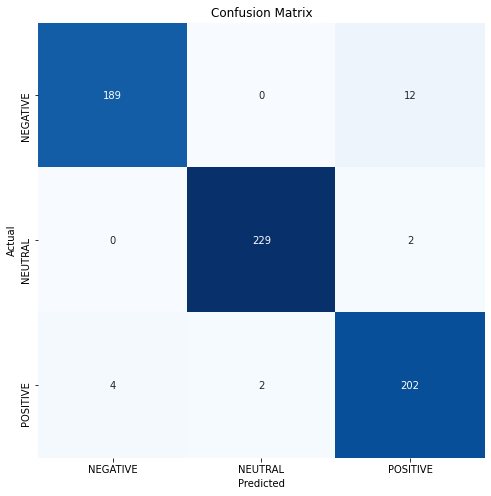

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.98      0.94      0.96       201
     NEUTRAL       0.99      0.99      0.99       231
    POSITIVE       0.94      0.97      0.95       208

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640



In [ ]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)